In [1]:
import numpy as np                  # type: ignore
import pandas as pd                 # type: ignore
import matplotlib.pyplot as plt     # type: ignore
import scipy.optimize as opt        # type: ignore

In [2]:
data = pd.read_csv('ex2data2.txt', header=None,names=['Test 1', 'Test 2', 'Accepted'])

print('data = \n', data.head(10))
print('**************************************')
print('data.shape = ', data.shape)
print('**************************************')
print('data.describe = \n', data.describe())

data = 
      Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
**************************************
data.shape =  (118, 3)
**************************************
data.describe = 
            Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000


In [3]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]

print("Accepted students:\n", positive, "\n")
print("NonAccepted students:\n",negative)

Accepted students:
       Test 1    Test 2  Accepted
0   0.051267  0.699560         1
1  -0.092742  0.684940         1
2  -0.213710  0.692250         1
3  -0.375000  0.502190         1
4  -0.513250  0.465640         1
5  -0.524770  0.209800         1
6  -0.398040  0.034357         1
7  -0.305880 -0.192250         1
8   0.016705 -0.404240         1
9   0.131910 -0.513890         1
10  0.385370 -0.565060         1
11  0.529380 -0.521200         1
12  0.638820 -0.243420         1
13  0.736750 -0.184940         1
14  0.546660  0.487570         1
15  0.322000  0.582600         1
16  0.166470  0.538740         1
17 -0.046659  0.816520         1
18 -0.173390  0.699560         1
19 -0.478690  0.633770         1
20 -0.605410  0.597220         1
21 -0.628460  0.334060         1
22 -0.593890  0.005117         1
23 -0.421080 -0.272660         1
24 -0.115780 -0.396930         1
25  0.201040 -0.601610         1
26  0.466010 -0.535820         1
27  0.673390 -0.535820         1
28 -0.138820  0.546050 

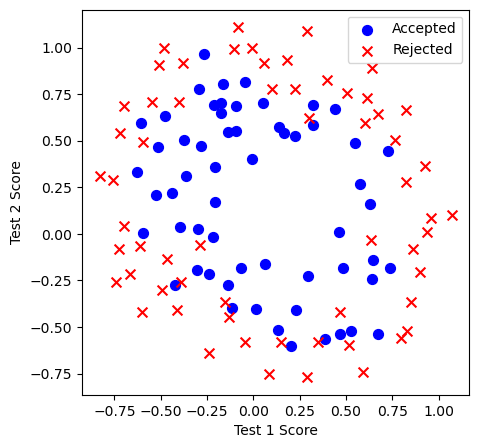

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

plt.show()

In [5]:
print('data.shape = ', data.shape)
print('**************************************')
data.insert(3, 'Ones', 1)    # insert(col_index,col_name,col_value)
print('new data = \n' ,data.head(10))
print('**************************************')
print('data.shape = ', data.shape)

data.shape =  (118, 3)
**************************************
new data = 
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1
**************************************
data.shape =  (118, 4)


In [6]:
x1 = data['Test 1']
x2 = data['Test 2']
print('x1 :\n',x1.head(10))
print('................................................')
print('x2 :\n',x2.head(10))

x1 :
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
5   -0.524770
6   -0.398040
7   -0.305880
8    0.016705
9    0.131910
Name: Test 1, dtype: float64
................................................
x2 :
 0    0.699560
1    0.684940
2    0.692250
3    0.502190
4    0.465640
5    0.209800
6    0.034357
7   -0.192250
8   -0.404240
9   -0.513890
Name: Test 2, dtype: float64


> 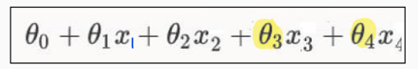

In [7]:
'''
[x1 + x1^2 + x1.x2 + x1^3 + x1^2.x2 + x1.x2^2 + x1^4 + x1^3.x2 + x1^2.x2^2 + x1.x2^3]

F10 = x1          >> one zero

F20 = x1^2        >> two zero
F21 = x1  .x2     >> two one

F30 = x1^3        >> three zero
F31 = x1^2.x2     >> three one
F32 = x1  .x2^2   >> three two

F40 = x1^4        >> four zero
F41 = x1^3.x2     >> four one
F42 = x1^2.x2^2   >> four two
F43 = x1  .x2^3   >> four three
'''
degree = 5

for i in range(1, degree):
    for j in range(0, i):  
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data :\n' , data.head(10))

data :
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7

In [8]:
# separate X (training data) from y (target variable) >>
cols = data.shape[1]
X2 = data.iloc[:,1:cols]
y2 = data.iloc[:,0:1]

print('X2 data = \n' ,X2.head(10) ,'\n')
print('y2 data = \n' ,y2.head(10))

X2 data = 
    Ones       F10       F20       F21       F30       F31       F32  \
0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.397855e-05 -0.000546  0.004035 -0.029801  
2  2.085928e-03 -0.006757  0.021886 -0.070895  
3  1.977539e-0

In [9]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])
print('theta2 = ' , theta2)
print('theta2.shape = ' , theta2.shape)

theta2 =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
theta2.shape =  (11,)


In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def costReg(theta, X, y, lr ):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2)) # start from theta 1 not 0
    return np.sum(first - second) / (len(X)) + reg

def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        if i == 0:
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:, i].item())
    return grad

In [ ]:
learningRate = 0.0000001

rcost = costReg(theta2, X2, y2, learningRate)
print('regularized cost =', rcost, "\n")

result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
print('result =', result, "\n")

def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0  for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)

correct =[1 if ((a == 1 and b == 1) or 
                (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]

accuracy = (sum(map(int, correct)) % len(correct))
print (f'accuracy = {accuracy} %')

regularized cost = 0.6931471805599454 

result = (array([  0.46207634,  -0.86355894,  15.50210435,  -9.09265552,
        10.30500034,  11.55012009,   0.95899157, -34.21075796,
         2.69412172, -37.10949064,   6.5926141 ]), 111, 3) 

accuracy = 93 %
